### Shivam Taneja 102003244

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Generating a HIGHLY correlated dataset

In [3]:
num_samples = 1000

# The desired mean values of the sample.
mu = np.array([5.0, 0.0, 10.0, 7.0, 5.5, 6.0, 7.0])

# The desired covariance matrix.
r = []
for i in range(7):
    l = []
    for j in range(7):
        l.append(np.random.random_sample() * random.randint(5, 10))
    r.append(l)
# Generate the random samples.
rng = np.random.default_rng()
X = rng.multivariate_normal(mu, r, size=num_samples)

C:\Users\shvmt\AppData\Local\Temp/ipykernel_3496/263652178.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  X = rng.multivariate_normal(mu, r, size=num_samples)


In [4]:
X.shape

(1000, 7)

In [5]:
df = pd.DataFrame(X, columns=['1', '2', '3', '4', '5', '6', '7'])

In [6]:
y = []
for i in range(1000):
    y.append(random.randint(15, 100))

In [7]:
y = pd.Series(y)
y

0      85
1      87
2      21
3      17
4      95
       ..
995    50
996    80
997    23
998    39
999    31
Length: 1000, dtype: int64

#### Correlation Matrix

<AxesSubplot:>

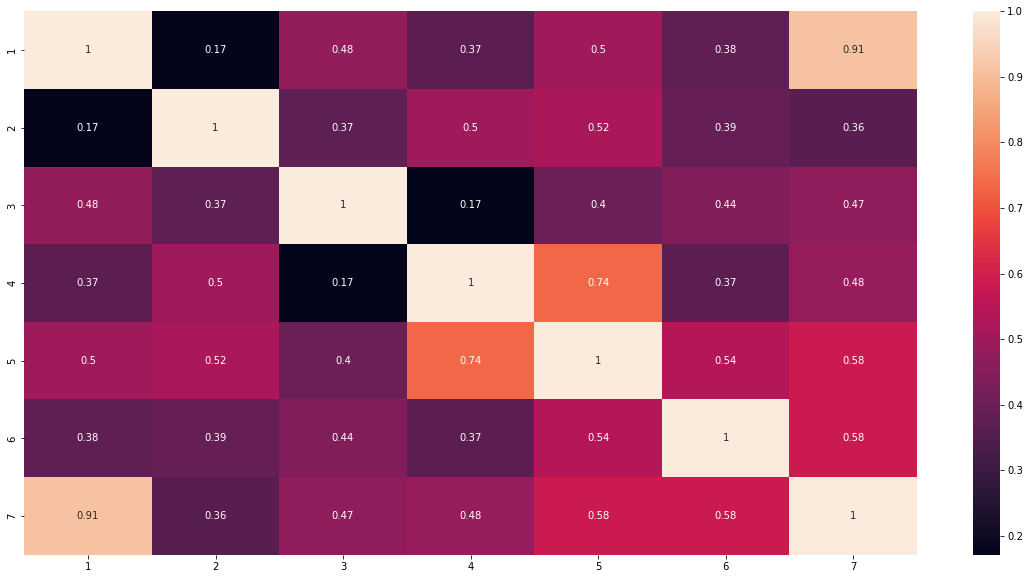

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

## Ridge Regression Implementation

In [9]:
class RidgeRegression():
    
    def __init__(self, learning_rate, iterations, l2_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l2_penalty = l2_penalty
    
    def fit(self, X, y):
        self.m, self.n = X.shape # no. of training examples, no. of features
        self.W = np.zeros(self.n)
        
        self.pen = 0
        self.X = X
        self.y = y
        
        #gradient descent
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        y_pred = self.predict(self.X)
        
        dW = (-(2*(self.X.T).dot(self.y - y_pred)) + (2*self.l2_penalty * self.W))/self.m   
        dpen= -2 * np.sum(self.y - y_pred)/self.m
        
        self.W = self.W - self.learning_rate * dW
        self.pen = self.pen - self.learning_rate * dpen
        
        return self
    
    def predict(self, X):
        return X.dot(self.W) + self.pen

In [10]:
def r2score(y_pred, y):
    y_mean = sum(y)/len(y)
    num = 0
    den = 0
    for i in range(len(y)):
        num = num + (y[i] - y_pred[i]) * (y[i] - y_pred[i])
        den = den + (y[i] - y_mean) * (y[i] - y_mean)
    return 1 - (num/den)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [13]:
lr = [0.0001,0.001,0.01,0.1,1,10]
pens = [pow(10, -15), pow(10,-10),pow(10,-5),pow(10,-3),0,1,10,20]
r2scores = []
for i in lr:
    for j in pens:
        model = RidgeRegression(iterations=500, learning_rate=i, l2_penalty=j)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2score(y_pred, list(y_test))
        r2scores.append(score)

C:\Users\shvmt\AppData\Local\Temp/ipykernel_3496/4210807142.py:24: RuntimeWarning: invalid value encountered in multiply
  dW = (-(2*(self.X.T).dot(self.y - y_pred)) + (2*self.l2_penalty * self.W))/self.m
C:\Users\shvmt\AppData\Local\Temp/ipykernel_3496/4210807142.py:25: RuntimeWarning: overflow encountered in double_scalars
  dpen= -2 * np.sum(self.y - y_pred)/self.m
C:\Users\shvmt\AppData\Local\Temp/ipykernel_3496/4210807142.py:28: RuntimeWarning: invalid value encountered in double_scalars
  self.pen = self.pen - self.learning_rate * dpen
C:\Users\shvmt\AppData\Local\Temp/ipykernel_3496/4210807142.py:24: RuntimeWarning: overflow encountered in multiply
  dW = (-(2*(self.X.T).dot(self.y - y_pred)) + (2*self.l2_penalty * self.W))/self.m


In [14]:
print(np.argmax(r2scores))

16


In [15]:
print(f"max r2score at learning rate = {0.001}, reg parameter = {10^-10}")

max r2score at learning rate = 0.001, reg parameter = -4


# Question 2

Loading dataset

In [126]:
df = pd.read_csv('Hitters.csv')

In [127]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [128]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
numeric_cols = numeric_data.columns
categorical_cols = categorical_data.columns
print(numeric_cols)
print(categorical_cols)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')
Index(['League', 'Division', 'NewLeague'], dtype='object')


#### Checking for null values

In [129]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

#### Filling null values with mean

In [130]:
df = df.fillna(df.Salary.mean())

In [49]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [131]:
X = df.drop(['Salary'], axis=1)
y = df['Salary']

#### Checking for unique values in categorical data

In [132]:
df.League.unique()

array(['A', 'N'], dtype=object)

In [133]:
df.Division.unique()

array(['E', 'W'], dtype=object)

In [75]:
df.NewLeague.unique()

array(['A', 'N'], dtype=object)

#### All 3 are ordinal values

In [134]:
from sklearn.preprocessing import OrdinalEncoder

In [135]:
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

In [136]:
X_encoded

array([[ 79.,  37.,   1., ...,  28.,  20.,   0.],
       [ 90.,  50.,   7., ...,  35.,  10.,   1.],
       [163.,  94.,  18., ...,  55.,  14.,   0.],
       ...,
       [162.,  90.,   3., ...,  72.,   7.,   0.],
       [211., 106.,   9., ...,  78.,  12.,   0.],
       [238., 125.,   9., ...,   4.,   3.,   0.]])

In [137]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=0.75, random_state=7)

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
model = LinearRegression()

In [176]:
model.fit(X_train, y_train)

LinearRegression()

In [177]:
from sklearn.metrics import mean_absolute_error
print(f"MAE for LR: {mean_absolute_error(y_test, model.predict(X_test))}")

MAE for LR: 260.644219017486


In [178]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.5748)

In [179]:
model.fit(X_train, y_train)

Ridge(alpha=0.5748)

In [180]:
print(f"MAE for Ridge: {mean_absolute_error(y_test, model.predict(X_test))}")

MAE for Ridge: 260.67950955867735


In [181]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.5748)

In [182]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4974429.491543476, tolerance: 3933.305949292099
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5748)

In [183]:
print(f"MAE for Lasso: {mean_absolute_error(y_test, model.predict(X_test))}")

MAE for Lasso: 260.85524303394084


### Lasso Had the least MAE
It performs best since, there were a lot of features, and lasso **selects** features as well as regularizes

# Question 3

In [107]:
from sklearn.datasets import load_boston

In [193]:
X, y = load_boston(return_X_y=True)

In [123]:
from sklearn.linear_model import RidgeCV, LassoCV

In [196]:
modelR = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
modelL = LassoCV(cv=5, random_state=7).fit(X, y)

In [198]:
print(modelR.score(X, y))
print(modelL.score(X, y))

0.7406421899247879
0.7024437179872696
